# 5 - Data Visualization and Profiling

## Data Quality

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../../optimus")

In [3]:
from optimus import Optimus 
op = Optimus("pandas")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LuisA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
df = op.load.file("foo.csv")

In [5]:
df

name 1 (object) not nullable,job 2 (object) not nullable,id 3 (int64) not nullable
optimus,Leader,1
optimus,Espionage,2
bumblebee,1,3
bumblebee,3,40


In [6]:
df = df.cols.set_dtype("salary", "int")
df

name 1 (object) not nullable,job 2 (object) not nullable,id 3 (int64) not nullable
optimus,Leader,1
optimus,Espionage,2
bumblebee,1,3
bumblebee,3,40


In [7]:
df = df.cols.set_dtype({"salary": "int", "age": "str"})  
df

name 1 (object) not nullable,job 2 (object) not nullable,id 3 (int64) not nullable
optimus,Leader,1
optimus,Espionage,2
bumblebee,1,3
bumblebee,3,40


In [8]:
df = op.create.dataframe({"numbers": [1, 2, None, 4]}) 

In [9]:
df.mask.missing("numbers").print() 

  numbers
   (bool)
---------
        0
        0
        1
        0


In [10]:
df = op.create.dataframe({"numbers": [1, 2, "Hello", 4, "World"]}) 
df

numbers 1 (object) not nullable
1
2
Hello
4
World


In [11]:
df.mask.match("numbers", "int").print()

  numbers
   (bool)
---------
        1
        1
        0
        1
        0


In [12]:
df.rows.select(df.mask.match("numbers", "int")).print() 

   numbers
  (object)
----------
         1
         2
         4


In [13]:
df.rows.drop(df.mask.match("numbers", "int")).print() 

numbers
(object)
----------
Hello
World


In [14]:
df.cols.set("numbers", value=0, where=df.mask.mismatch("numbers", "int")).print() 

   numbers
  (object)
----------
         1
         2
         0
         4
         0


In [15]:
df.profile()

{'columns': {'numbers': {'stats': {'match': 3,
    'missing': 0,
    'mismatch': 2,
    'profiler_dtype': {'dtype': 'int', 'categorical': True},
    'frequency': [{'value': 1, 'count': 1},
     {'value': 2, 'count': 1},
     {'value': 4, 'count': 1},
     {'value': 'World', 'count': 1},
     {'value': 'Hello', 'count': 1}],
    'count_uniques': 5},
   'dtype': 'object'}},
 'name': None,
 'file_name': None,
 'summary': {'cols_count': 1,
  'rows_count': 5,
  'dtypes_list': ['object'],
  'total_count_dtypes': 1,
  'missing_count': 0,
  'p_missing': 0.0}}

In [16]:
df.cols.dtypes("numbers")
df.mask.mismatch("numbers")

numbers 1 (bool) not nullable
False
False
True
False
True


In [17]:
df["numbers"].profile.dtypes()

'int'

In [18]:
df.cols.set("numbers", value=0, where=df.mask.mismatch("numbers")) 

numbers 1 (object) not nullable
1
2
0
4
0


## Exploratory Data Analysis

In [19]:
from optimus import Optimus  
op = Optimus("pandas") 
df = op.load.file("store.csv")
df.print(10, ["id", "name", "code", "price"]) 

       id  name        code              price
  (int64)  (object)    (object)      (float64)
---------  ----------  ----------  -----------
        1  pants       L15              173.47
        2  shoes       SH                69.99
        3  shirt       RG30              30
        4  pants       J10               34.99
        5  pants       JG15             132.99
        6  shoes       B                 57.99
        7  pants       JG20             179.99
        8  pants       L20               95
        9  shirt       FT50              50
       10  pants       JG15             169.99
       11  pants       JG15              88.47


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LuisA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
df.cols.min("id") 

1

In [21]:
df.cols.max("id") 

504

In [22]:
df.cols.mode("price")

50.0

In [23]:
df.cols.median("price") 

104.99

In [24]:
df.cols.iqr("price") 

130.01

In [25]:
df.cols.mean("price")

121.30525793650794

In [26]:
df.cols.std("price") 

93.16652086384731

In [27]:
df.cols.var("price") 

8680.000609873696

In [28]:
df.data["price"].skew() 

1.0015117495305208

In [29]:
df.cols.kurtosis("price") 

0.45556375186033016

In [30]:
df.cols.count_zeros("discount")

294

In [ ]:
df.cols.count_nulls("discount") 

In [32]:
df.cols.count_na("discount") 

0

In [33]:
df.cols.count_uniques("price") 

192

## Data Profiling

In [34]:
df.cols.hist("price",5) 

{'hist': {'price': [{'lower': 5.0, 'upper': 103.3675, 'count': 250},
   {'lower': 103.3675, 'upper': 201.735, 'count': 179},
   {'lower': 201.735, 'upper': 300.1025, 'count': 39},
   {'lower': 300.1025, 'upper': 398.47, 'count': 36}]}}

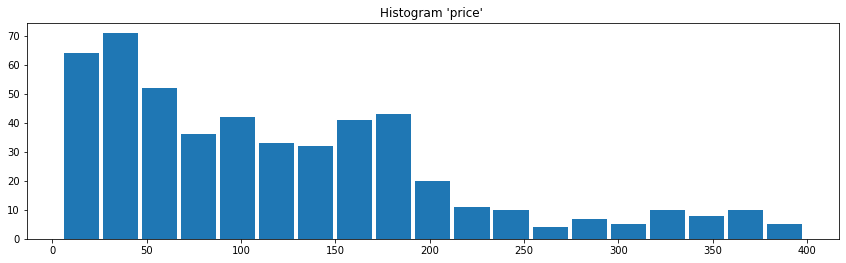

In [35]:
df.plot.hist("price",20)

In [36]:
df.cols.frequency("code", 5) 

{'frequency': {'code': {'values': [{'value': 'JG15', 'count': 60},
    {'value': 'JG10', 'count': 43},
    {'value': 'SK', 'count': 37},
    {'value': 'L15', 'count': 33},
    {'value': 'S', 'count': 32}]}}}

In [37]:
df.cols.frequency("code", 5, tidy=True)

{'code': {'values': [{'value': 'JG15', 'count': 60},
   {'value': 'JG10', 'count': 43},
   {'value': 'SK', 'count': 37},
   {'value': 'L15', 'count': 33},
   {'value': 'S', 'count': 32}]}}

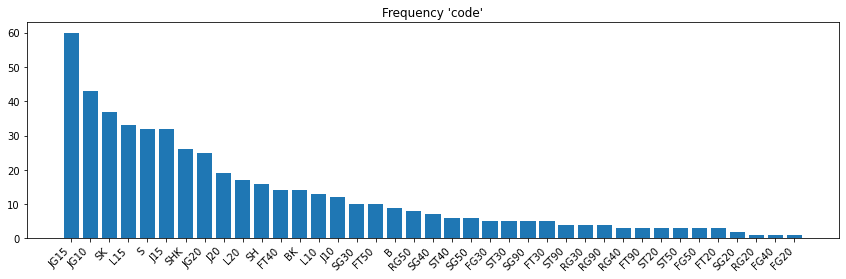

In [38]:
df.plot.frequency("code", 40) 

In [39]:
df.cols.scatter("id")

AttributeError: 'Cols' object has no attribute 'scatter'

In [42]:
df.plot.scatter("id") 

AttributeError: 'Plot' object has no attribute 'scatter'

In [43]:
df.cols.boxplot("price") 

{'price': {'mean': 121.30525793650794,
  'median': 104.99,
  'q1': 44.99,
  'q3': 175.0,
  'whisker_low': -150.02499999999998,
  'whisker_high': 370.015,
  'fliers': [374.99],
  'label': 'price'}}

In [44]:
df.plot.box("id") 

IndexError: list index out of range

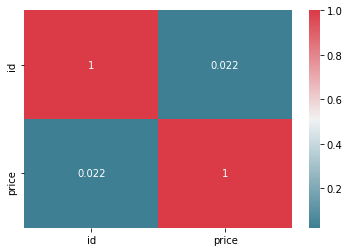

In [45]:
df.plot.correlation("*") 

In [46]:
df.profile(bins=5)

{'columns': {'id': {'stats': {'match': 504,
    'missing': 0,
    'mismatch': 0,
    'profiler_dtype': {'dtype': 'int', 'categorical': True},
    'frequency': [{'value': 1, 'count': 1},
     {'value': 332, 'count': 1},
     {'value': 345, 'count': 1},
     {'value': 344, 'count': 1},
     {'value': 343, 'count': 1}],
    'count_uniques': 504},
   'dtype': 'int64'},
  'name': {'stats': {'match': 504,
    'missing': 0,
    'mismatch': 0,
    'profiler_dtype': {'dtype': 'str', 'categorical': True},
    'frequency': [{'value': 'pants', 'count': 254},
     {'value': 'shoes', 'count': 134},
     {'value': 'shirt', 'count': 116}],
    'count_uniques': 3},
   'dtype': 'object'},
  'code': {'stats': {'match': 504,
    'missing': 0,
    'mismatch': 0,
    'profiler_dtype': {'dtype': 'str', 'categorical': True},
    'frequency': [{'value': 'JG15', 'count': 60},
     {'value': 'JG10', 'count': 43},
     {'value': 'SK', 'count': 37},
     {'value': 'L15', 'count': 33},
     {'value': 'S', 'count': 

In [47]:
df.profile.summary()

{'cols_count': 5,
 'rows_count': 504,
 'dtypes_list': ['float64', 'int64', 'object'],
 'total_count_dtypes': 3,
 'missing_count': 0,
 'p_missing': 0.0}

In [48]:
df.profile.columns()

[{'stats': {'match': 504,
   'missing': 0,
   'mismatch': 0,
   'profiler_dtype': {'dtype': 'int', 'categorical': True},
   'frequency': [{'value': 1, 'count': 1},
    {'value': 332, 'count': 1},
    {'value': 345, 'count': 1},
    {'value': 344, 'count': 1},
    {'value': 343, 'count': 1}],
   'count_uniques': 504},
  'dtype': 'int64'},
 {'stats': {'match': 504,
   'missing': 0,
   'mismatch': 0,
   'profiler_dtype': {'dtype': 'str', 'categorical': True},
   'frequency': [{'value': 'pants', 'count': 254},
    {'value': 'shoes', 'count': 134},
    {'value': 'shirt', 'count': 116}],
   'count_uniques': 3},
  'dtype': 'object'},
 {'stats': {'match': 504,
   'missing': 0,
   'mismatch': 0,
   'profiler_dtype': {'dtype': 'str', 'categorical': True},
   'frequency': [{'value': 'JG15', 'count': 60},
    {'value': 'JG10', 'count': 43},
    {'value': 'SK', 'count': 37},
    {'value': 'L15', 'count': 33},
    {'value': 'S', 'count': 32}],
   'count_uniques': 39},
  'dtype': 'object'},
 {'stats'

In [49]:
df.visual_profile() 

AttributeError: 'PandasDataFrame' object has no attribute 'visual_profile'

In [50]:
from optimus.helpers.constants import Actions
Actions.list()

['profiler_dtype',
 'match',
 'lower',
 'upper',
 'proper',
 'pad',
 'trim',
 'reverse',
 'remove',
 'left',
 'right',
 'mid',
 'replace',
 'fill_na',
 'cast',
 'is_na',
 'z_score',
 'nest',
 'unnest',
 'set',
 'string_to_index',
 'date_format',
 'index_to_string',
 'min_max_scaler',
 'max_abs_scaler',
 'standard_scaler',
 'apply_cols',
 'impute',
 'extract',
 'abs',
 'math',
 'variance',
 'slice',
 'clip',
 'drop',
 'keep',
 'cut',
 'to_float',
 'to_integer',
 'to_boolean',
 'to_string',
 'years',
 'append',
 'port',
 'copy',
 'rename',
 'unique',
 'infer',
 'word_tokenize',
 'length',
 'get',
 'item',
 'domain',
 'domain_scheme',
 'subdomain',
 'host',
 'domain_params',
 'domain_path',
 'email_domain',
 'email_user',
 'fingerprint',
 'ngram_fingerprint',
 'ngrams',
 'soundex',
 'metaphone',
 'double_metaphone',
 'match_rating_codex',
 'nysiis',
 'select_row',
 'drop_row',
 'between_drop',
 'sort_row']